# Weather Py 

---------------

### Excercise Dependencies

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

### Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API calls

* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).

In [3]:
#Save the config info
url = "http://api.openweathermap.org/data/2.5/weather?"

# set up lists to hold reponse info

cloudiness = []
country = []
date = []
humidity = []
lat = []
long = []
max_temp = []
wind_speed = []
updated_cities = []

count = 0 #initializing and referencing count

# Loop through the list of cities and perform a request for data on each
query_url = url + "appid=" + weather_api_key + "&q="
print(query_url + cities[2])

http://api.openweathermap.org/data/2.5/weather?appid=f30c3f3723cf67f5d213047206802118&q=tabuk


In [4]:
print("Beginning Data Retrieval")
print("-" * 25)

for city in cities:
    full_url = query_url + city
    response = requests.get(full_url).json()
    time.sleep(2)
    count += 1
    
    try:
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        long.append(response["coord"]["lon"])
        temp_fht = ((response["main"]["temp_max"] - 273.15) * 9/5) + 32
        max_temp.append(temp_fht)
        wind_mph = response["wind"]["speed"]
        wind_speed.append(wind_mph)
        updated_cities.append(city)
        set_number = response["sys"]["type"]
        print(f"Processing Record {count} of Set {set_number}  | {city}")
    
    except:
        print("City not found. Skipping...")
        pass

print("-" * 25)
print("Data Retrieval Complete")
print("-" * 25)

Beginning Data Retrieval
-------------------------
Processing Record 1 of Set 3  | port alfred
City not found. Skipping...
City not found. Skipping...
Processing Record 4 of Set 1  | nikolskoye
Processing Record 5 of Set 1  | fortuna
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 9 of Set 3  | killybegs
Processing Record 10 of Set 1  | college
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 15 of Set 1  | saint-philippe
City not found. Skipping...
Processing Record 17 of Set 1  | jamestown
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 21 of Set 1  | imbituba
Processing Record 22 of Set 1  | garden city
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 26 of Set 1  | iqaluit
Processing Record 27 of Set 1  | bredasdorp
City not found. Skipping...


Processing Record 231 of Set 1  | kihei
City not found. Skipping...
Processing Record 233 of Set 1  | guasdualito
Processing Record 234 of Set 1  | wharton
Processing Record 235 of Set 1  | new norfolk
City not found. Skipping...
Processing Record 237 of Set 1  | ewa beach
Processing Record 238 of Set 1  | cap malheureux
City not found. Skipping...
Processing Record 240 of Set 1  | thompson
City not found. Skipping...
Processing Record 242 of Set 1  | ancud
Processing Record 243 of Set 1  | tottori
Processing Record 244 of Set 1  | ballina
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 248 of Set 1  | trofors
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 255 of Set 1  | isangel
Processing Record 256 of Set 1  | bathsheba
City not found. Skipping...
City not found. Skipping...
City not found. Sk

Processing Record 470 of Set 1  | strezhevoy
Processing Record 471 of Set 1  | smiths falls
City not found. Skipping...
Processing Record 473 of Set 1  | praia da vitoria
Processing Record 474 of Set 3  | tuatapere
Processing Record 475 of Set 1  | florianopolis
Processing Record 476 of Set 1  | owosso
Processing Record 477 of Set 1  | slave lake
City not found. Skipping...
City not found. Skipping...
Processing Record 480 of Set 1  | concepcion
Processing Record 481 of Set 1  | cam ranh
Processing Record 482 of Set 1  | west wendover
City not found. Skipping...
Processing Record 484 of Set 1  | albert town
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 489 of Set 1  | valparaiso
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Proc

### Convert Raw Data into Data Frame

In [5]:
Weather_df = pd.DataFrame({'City':updated_cities, 'Cloudiness':cloudiness,
                          'Country':country, 'Date': date, 'Humidity':humidity, 'Lat':lat, 
                          'Lng':long, 'Max Temp':max_temp, 'Wind Speed':wind_speed})
Weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,port alfred,100,ZA,1584322882,98,-33.59,26.89,62.996,4.81
1,koulamoutou,52,GA,1584322884,97,-1.13,12.47,71.204,0.66
2,tabuk,82,PH,1584322419,74,17.42,121.44,76.514,5.15
3,nikolskoye,75,RU,1584322392,55,59.70,30.79,33.800,4.00
4,fortuna,20,US,1584322458,70,40.60,-124.16,48.200,4.60
...,...,...,...,...,...,...,...,...,...
560,presidencia roque saenz pena,64,AR,1584324185,95,-26.79,-60.44,71.330,2.16
561,borujerd,0,IR,1584324187,89,33.90,48.75,33.746,1.77
562,kenora,90,CA,1584324189,85,49.82,-94.43,24.800,2.60
563,marica,0,BR,1584324042,78,-22.92,-42.82,80.600,3.10


In [6]:
# Output File (CSV)
Weather_df.to_csv('output_data\cities.csv', index = False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

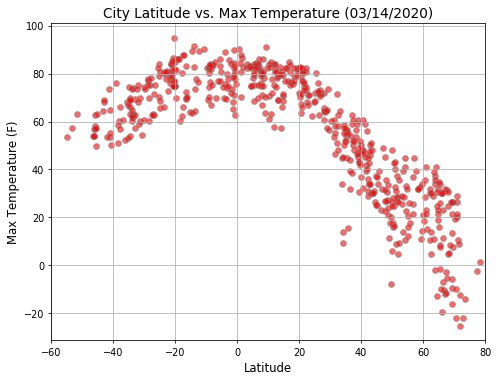

In [8]:
#Plotting the Data
#Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
#Save the plotted figures as .pngs.

#1. Latitude vs Max Temperature
plt.figure(figsize=(8, 6), dpi=70)
plt.scatter(Weather_df["Lat"], Weather_df["Max Temp"], marker="o", facecolors="red", edgecolors="grey", 
            alpha=0.6)

#Aaesthetics
plt.title("City Latitude vs. Max Temperature (03/14/2020)", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Max Temperature (F)", fontsize=12)
plt.xlim(-60, 80)
plt.grid(10)

#Saving an image of this plot
plt.savefig("Images/3-CityLat vs MaxTemp.png")
plt.show()

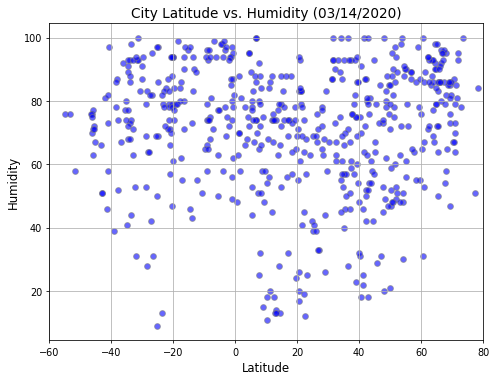

In [9]:
#Latitude vs. Humidity Plot
plt.figure(figsize=(8, 6), dpi=70)
plt.scatter(Weather_df["Lat"], Weather_df["Humidity"], marker="o", facecolors="blue", edgecolors="grey", 
            alpha=0.6)

#Aaesthetics
plt.title("City Latitude vs. Humidity (03/14/2020)", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Humidity", fontsize=12)
plt.xlim(-60, 80)
plt.grid(10)


#Saving an image of this plot
plt.savefig("Images/4-CityLat vs Humidity.png")
plt.show()

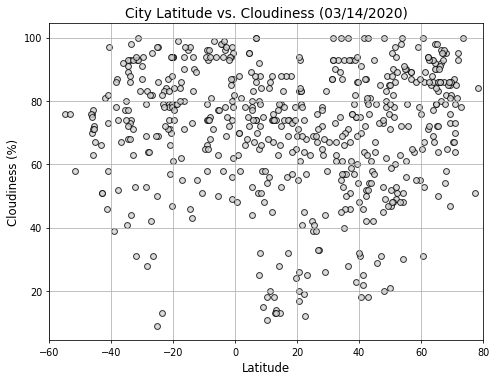

In [10]:
#Latitude vs. Cloudiness Plot
plt.figure(figsize=(8, 6), dpi=70)
plt.scatter(Weather_df["Lat"], Weather_df["Humidity"], marker="o", facecolors="lightgrey", edgecolors="black", 
            alpha=0.8)

#Aaesthetics

plt.title("City Latitude vs. Cloudiness (03/14/2020)", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Cloudiness (%)", fontsize=12)
plt.xlim(-60, 80)
plt.grid(10)

#Saving an image of this plot
plt.savefig("Images/5-CityLat vs Cloudiness.png")
plt.show()

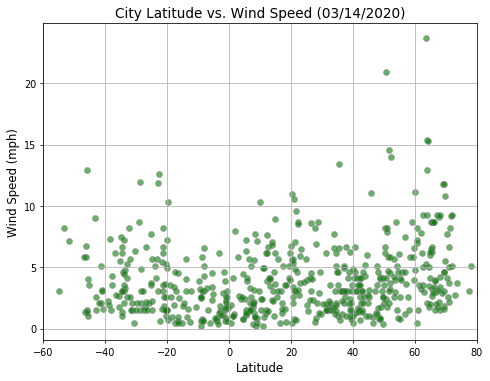

In [11]:
#Latitude vs. Wind Speed Plot
plt.figure(figsize=(8, 6), dpi=70)
plt.scatter(Weather_df["Lat"], Weather_df["Wind Speed"], marker="o", facecolors="green", edgecolors="grey", 
            alpha=0.6)

#Aaesthetics
plt.title("City Latitude vs. Wind Speed (03/14/2020)", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Wind Speed (mph)", fontsize=12)
plt.xlim(-60, 80)
plt.grid(10)

#Saving an image of this plot
plt.savefig("Images/6-CityLat vs WindSpeed.png")
plt.show()

### Linear Regression
* OPTIONAL: Create a function to create Linear Regression plots

The r-squared is: -0.740130764749906
y = -0.57x + 65.62


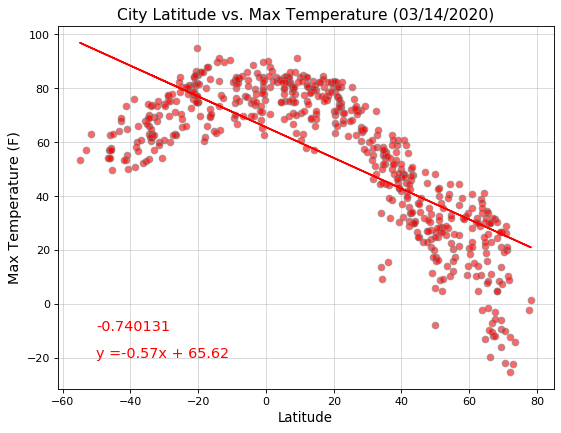

In [12]:
#Linear regression - City Latitude vs. Max Temperature
#Variables x and y
x_values = Weather_df["Lat"]
y_values = Weather_df["Max Temp"]

# Get slope, intercept from linregress() to plot y' = intercept + slope*x
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Plot linear regression line.
y_pred = x_values * slope + intercept
equation = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
r2value = round(rvalue, 6)
print(f"The r-squared is: {rvalue}")
print(f'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2)))

#Plotting the scatter chart and line regression
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(x_values,y_values, marker="o", color = "red", facecolors="red", edgecolors="grey", 
            alpha=0.6)
plt.plot(x_values,y_pred,"r-")

#Aaesthetics
plt.annotate(equation,(-50,-20),fontsize=13,color="red")
plt.annotate(r2value,(-50,-10),fontsize=13,color="red")
plt.title("City Latitude vs. Max Temperature (03/14/2020)", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Max Temperature (F)", fontsize=13)
plt.grid(color='grey', linestyle='-', linewidth=0.5, alpha=0.5)

#Saving an image of this plot
plt.savefig("Images/7-LineRegress-CityLat vs MaxTemp.png")
plt.show()

#### This linear regression does not fit the Max Temperature behavior as a function of Latitude. Two linear regressions can independently explain the Max Temperature vs Latitude, as we plot the Northern and Southern Hemispheres. Also a polynomial regression can explain the behavior of the datset as a whole

The r-squared is: -0.0063241617181888695
y = -0.0x + 71.12


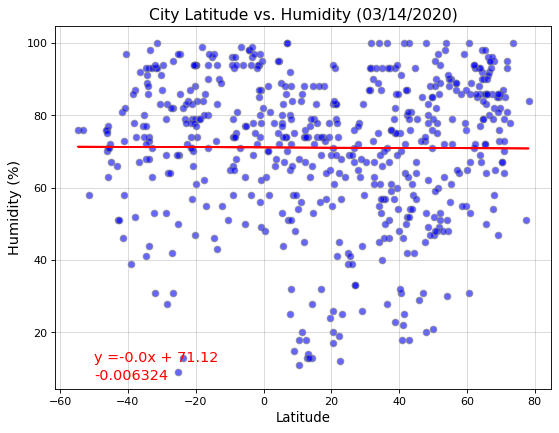

In [13]:
#Linear Regression - City Latitude vs. Cloudiness

# OPTIONAL: Create a function to create Linear Regression plots
#Variables x and y
x_values = Weather_df["Lat"]
y_values = Weather_df["Humidity"]

# Get slope, intercept from linregress() to plot y' = intercept + slope*x
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Plot linear regression line.
y_pred = x_values * slope + intercept
equation = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
r2value = round(rvalue, 6)
print(f"The r-squared is: {rvalue}")
print(f'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2)))

#Plotting the scatter chart and line regression
plt.figure(figsize=(8, 6), dpi=80)

plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="grey", 
            alpha=0.6)
plt.plot(x_values,y_pred,"r-")

#Aaesthetics
plt.annotate(equation,(-50,12),fontsize=13,color="red")
plt.annotate(r2value,(-50,7),fontsize=13,color="red")
plt.title("City Latitude vs. Humidity (03/14/2020)", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Humidity (%)", fontsize=13)
plt.grid(color='grey', linestyle='-', linewidth=0.5, alpha=0.5)

#Saving an image of this plot
plt.savefig("Images/8-LineRegress-CityLat vs Humidity.png")
plt.show()

#### In this case, data dispersion is anomously high. There is no relationship between both plotted variables. Thus, the linear regression does not represent the data. As expected, the rvalue is near to zero.

The r-squared is: 0.024366786720672415
y = 0.03x + 50.41


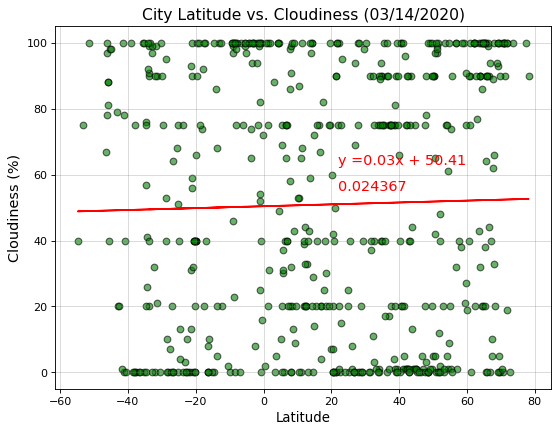

In [30]:
#Linear Regression - City Latitude vs. Cloudiness

# OPTIONAL: Create a function to create Linear Regression plots
#Variables x and y
x_values = Weather_df["Lat"]
y_values = Weather_df["Cloudiness"]

# Get slope, intercept from linregress() to plot y' = intercept + slope*x
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Plot linear regression line.
y_pred = x_values * slope + intercept
equation = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
r2value = round(rvalue, 6)
print(f"The r-squared is: {rvalue}")
print(f'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2)))

#Plotting the scatter chart and line regression
plt.figure(figsize=(8, 6), dpi=80)

plt.scatter(x_values,y_values, marker="o", facecolors="green", edgecolors="black", 
            alpha=0.6)
plt.plot(x_values,y_pred,"r-")

#Aaesthetics
plt.annotate(equation,(22,63),fontsize=13,color="red")
plt.annotate(r2value,(22,55),fontsize=13,color="red")
plt.title("City Latitude vs. Cloudiness (03/14/2020)", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Cloudiness (%)", fontsize=13)
plt.grid(color='grey', linestyle='-', linewidth=0.5, alpha=0.5)

#Saving an image of this plot
plt.savefig("Images/9-LineRegress-CityLat vs Cloudiness.png")
plt.show()

#### Same analysis as the above

The r-squared is: 0.17928135820007096
y = 0.02x + 3.58


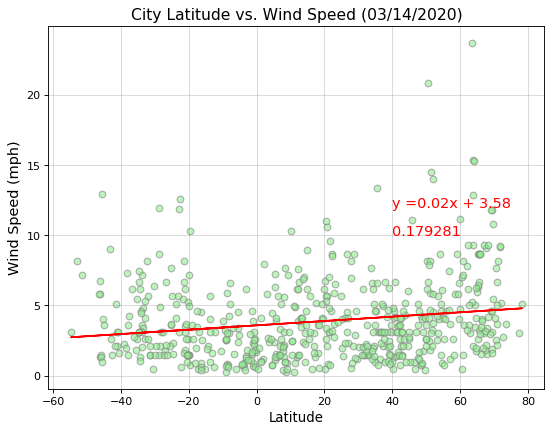

In [29]:
#Linear Regression - City Latitude vs. Wind Speed

# OPTIONAL: Create a function to create Linear Regression plots
#Variables x and y
x_values = Weather_df["Lat"]
y_values = Weather_df["Wind Speed"]

# Get slope, intercept from linregress() to plot y' = intercept + slope*x
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Plot linear regression line.
y_pred = x_values * slope + intercept
equation = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
r2value = round(rvalue, 6)
print(f"The r-squared is: {rvalue}")
print(f'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2)))

#Plotting the scatter chart and line regression
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(x_values,y_values, marker="o", color = "red", facecolors="lightgreen", edgecolors="grey", 
            alpha=0.6)
plt.plot(x_values,y_pred,"r-")

#Aaesthetics
plt.annotate(equation,(40,12),fontsize=13,color="red")
plt.annotate(r2value,(40,10),fontsize=13,color="red")
plt.title("City Latitude vs. Wind Speed (03/14/2020)", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Wind Speed (mph)", fontsize=13)
plt.grid(color='grey', linestyle='-', linewidth=0.5, alpha=0.5)

#Saving an image of this plot
plt.savefig("Images/10-LineRegress-CityLat vs WindSpeed.png")
plt.show()

#### The above chart shows a very low rvalue. Therefore, a very low or non existant correlation

## Create Northern and Southern Hemisphere DataFrames

In [16]:
#Defining Northern and Suthern DataFrames
NortHem_temp = Weather_df.loc[Weather_df["Lat"] >= 0, ["Lat", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]]

SoutHem_temp = Weather_df.loc[Weather_df["Lat"] < 0, ["Lat", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]]

### Charts for Northern Hemisphere

The r-squared is: -0.9034307691788672
y = -1.18x + 91.89


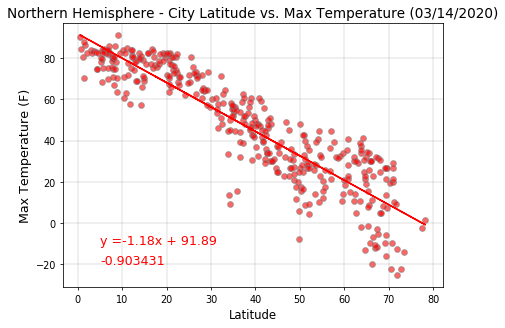

In [17]:
#1. Northern Hemisphere linear regression - City Latitude vs. Max Temperature
#Variables x and y
x_values = NortHem_temp["Lat"]
y_values = NortHem_temp["Max Temp"]

# Get slope, intercept from linregress() to plot y' = intercept + slope*x
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Plot linear regression line.
y_pred = x_values * slope + intercept
equation = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
r2value = round(rvalue, 6)
print(f"The r-squared is: {rvalue}")
print(f'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2)))

#Plotting the scatter chart and line regression
plt.figure(figsize=(7,5), dpi=70)
plt.scatter(x_values,y_values, marker="o", color = "red", facecolors="red", edgecolors="grey", 
            alpha=0.6)
plt.plot(x_values,y_pred,"r-")

#Aaesthetics
plt.annotate(equation,(5,-10),fontsize=13,color="red")
plt.annotate(r2value,(5,-20),fontsize=13,color="red")
plt.title("Northern Hemisphere - City Latitude vs. Max Temperature (03/14/2020)", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Max Temperature (F)", fontsize=13)
plt.grid(color='grey', linestyle='-', linewidth=0.5, alpha=0.5)

#Saving an image of this plot
plt.savefig("Images/13-NH_LineRegress-CityLat vs MaxTemp.png")
plt.show()

#### There is a good linear correlation between Max Temperature and Latitude in this case. Rvalue is reasonably high. Dispersion is slightly higher for lower temperatures, where lesser data points are available. Higher Max Temperatures occur when the Equator is approach, and viceversa when approaching the north pole.

The r-squared is: 0.2498698546095318
y = 0.25x + 59.18


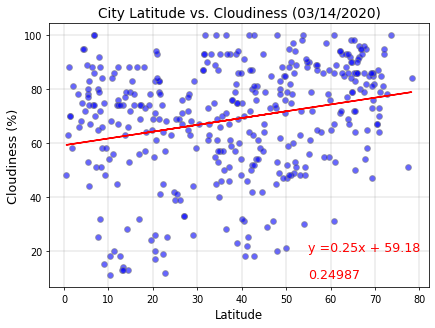

In [18]:
#Northern Hemmisphere linear Regression - City Latitude vs. Cloudiness

#Variables x and y
x_values = NortHem_temp["Lat"]
y_values = NortHem_temp["Humidity"]

# Get slope, intercept from linregress() to plot y' = intercept + slope*x
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Plot linear regression line.
y_pred = x_values * slope + intercept
equation = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
r2value = round(rvalue, 6)
print(f"The r-squared is: {rvalue}")
print(f'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2)))

#Plotting the scatter chart and line regression
plt.figure(figsize=(7,5), dpi=70)

plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="grey", 
            alpha=0.6)
plt.plot(x_values,y_pred,"r-")

#Aaesthetics
plt.annotate(equation,(55,20),fontsize=13,color="red")
plt.annotate(r2value,(55,10),fontsize=13,color="red")
plt.title("City Latitude vs. Cloudiness (03/14/2020)", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Cloudiness (%)", fontsize=13)
plt.grid(color='grey', linestyle='-', linewidth=0.5, alpha=0.5)

#Saving an image of this plot
plt.savefig("Images/14-NH LineRegress-CityLat vs Humidity.png")
plt.show()

#### In this case, data dispersion is high. There is not a significant linear correlation between both plotted variables. Thus, the linear regression does not properly represent the data. As expected, the rvalue and the slope are low.

The r-squared is: 0.14464894449544682
y = 0.27x + 38.75


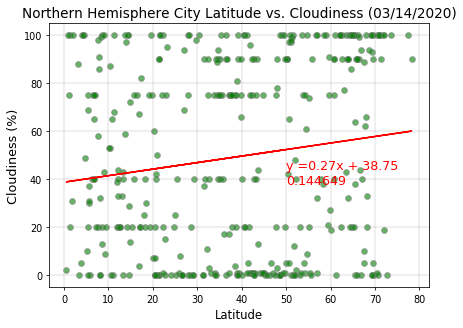

In [28]:


#Northern Hemisphere linear Regression - City Latitude vs. Cloudiness

# OPTIONAL: Create a function to create Linear Regression plots
#Variables x and y
x_values = NortHem_temp["Lat"]
y_values = NortHem_temp["Cloudiness"]

# Get slope, intercept from linregress() to plot y' = intercept + slope*x
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Plot linear regression line.
y_pred = x_values * slope + intercept
equation = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
r2value = round(rvalue, 6)
print(f"The r-squared is: {rvalue}")
print(f'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2)))

#Plotting the scatter chart and line regression
plt.figure(figsize=(7,5), dpi=70)

plt.scatter(x_values,y_values, marker="o", facecolors="green", edgecolors="grey", 
            alpha=0.6)
plt.plot(x_values,y_pred,"r-")

#Aaesthetics
plt.annotate(equation,(50,44),fontsize=13,color="red")
plt.annotate(r2value,(50,38),fontsize=13,color="red")
plt.title("Northern Hemisphere City Latitude vs. Cloudiness (03/14/2020)", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Cloudiness (%)", fontsize=13)
plt.grid(color='grey', linestyle='-', linewidth=0.5, alpha=0.5)

#Saving an image of this plot
plt.savefig("Images/15-NH LineRegress-CityLat vs Cloudiness.png")
plt.show()

#### Same as above analysis. Cloudiness does not show any significant correlation with Latitude.

The r-squared is: 0.2469267502753627
y = 0.04x + 2.73


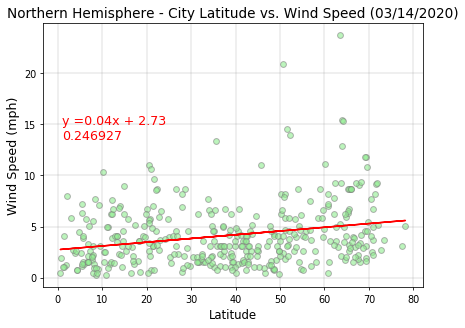

In [20]:
#Linear Regression - City Latitude vs. Wind Speed

# OPTIONAL: Create a function to create Linear Regression plots
#Variables x and y
x_values = NortHem_temp["Lat"]
y_values = NortHem_temp["Wind Speed"]

# Get slope, intercept from linregress() to plot y' = intercept + slope*x
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Plot linear regression line.
y_pred = x_values * slope + intercept
equation = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
r2value = round(rvalue, 6)
print(f"The r-squared is: {rvalue}")
print(f'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2)))

#Plotting the scatter chart and line regression
plt.figure(figsize=(7, 5), dpi=70)
plt.scatter(x_values,y_values, marker="o", color = "red", facecolors="lightgreen", edgecolors="grey", 
            alpha=0.6)
plt.plot(x_values,y_pred,"r-")

#Aaesthetics
plt.annotate(equation,(1,15),fontsize=13,color="red")
plt.annotate(r2value,(1,13.5),fontsize=13,color="red")
plt.title("Northern Hemisphere - City Latitude vs. Wind Speed (03/14/2020)", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Wind Speed (mph)", fontsize=13)
plt.grid(color='grey', linestyle='-', linewidth=0.5, alpha=0.5)

#Saving an image of this plot
plt.savefig("Images/16-NH LineRegress-CityLat vs WindSpeed.png")
plt.show()

#### The above chart shows a very low rvalue. Therefore, a very low or non existant correlation between Wind Speed and Latitude

### Charts for Southern Hemisphere

The r-squared is: 0.6422028812503882
y = 0.47x + 82.86


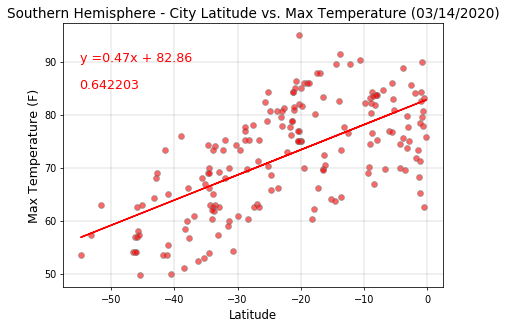

In [21]:
#1. Southern Hemisphere linear regression - City Latitude vs. Max Temperature
#Variables x and y
x_values = SoutHem_temp["Lat"]
y_values = SoutHem_temp["Max Temp"]

# Get slope, intercept from linregress() to plot y' = intercept + slope*x
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Plot linear regression line.
y_pred = x_values * slope + intercept
equation = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
r2value = round(rvalue, 6)
print(f"The r-squared is: {rvalue}")
print(f'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2)))

#Plotting the scatter chart and line regression
plt.figure(figsize=(7,5), dpi=70)
plt.scatter(x_values,y_values, marker="o", color = "red", facecolors="red", edgecolors="grey", 
            alpha=0.6)
plt.plot(x_values,y_pred,"r-")

#Aaesthetics
plt.annotate(equation,(-55, 90),fontsize=13,color="red")
plt.annotate(r2value,(-55, 85),fontsize=13,color="red")
plt.title("Southern Hemisphere - City Latitude vs. Max Temperature (03/14/2020)", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Max Temperature (F)", fontsize=13)
plt.grid(color='grey', linestyle='-', linewidth=0.5, alpha=0.5)

#Saving an image of this plot
plt.savefig("Images/17-SH_LineRegress-CityLat vs MaxTemp.png")
plt.show()

#### There is higher dispersion than in the case of the Northern Hemisphere. There is not a clear linear correlation between Max Temperatures and Latitudes for the Southern Hemisphere. This is evidenced by the rvalue.

The r-squared is: 0.185098602131579
y = 0.23x + 80.97


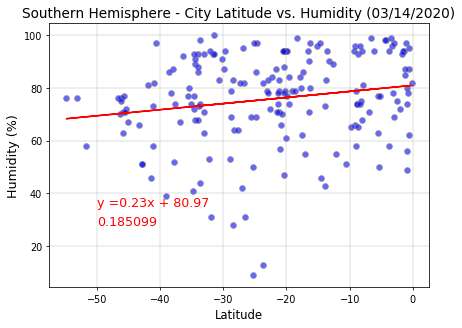

In [22]:
#Southern Hemmisphere linear Regression - City Latitude vs. Humidity

#Variables x and y
x_values = SoutHem_temp["Lat"]
y_values = SoutHem_temp["Humidity"]

# Get slope, intercept from linregress() to plot y' = intercept + slope*x
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Plot linear regression line.
y_pred = x_values * slope + intercept
equation = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
r2value = round(rvalue, 6)
print(f"The r-squared is: {rvalue}")
print(f'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2)))

#Plotting the scatter chart and line regression
plt.figure(figsize=(7,5), dpi=70)

plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="grey", 
            alpha=0.6)
plt.plot(x_values,y_pred,"r-")

#Aaesthetics
plt.annotate(equation,(-50,35),fontsize=13,color="red")
plt.annotate(r2value,(-50,28),fontsize=13,color="red")
plt.title("Southern Hemisphere - City Latitude vs. Humidity (03/14/2020)", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Humidity (%)", fontsize=13)
plt.grid(color='grey', linestyle='-', linewidth=0.5, alpha=0.5)

#Saving an image of this plot
plt.savefig("Images/18-SH LineRegress-CityLat vs Humidity.png")
plt.show()

#### Same case as the Northern Hemisphere

The r-squared is: 0.1498788145673326
y = 0.43x + 64.44


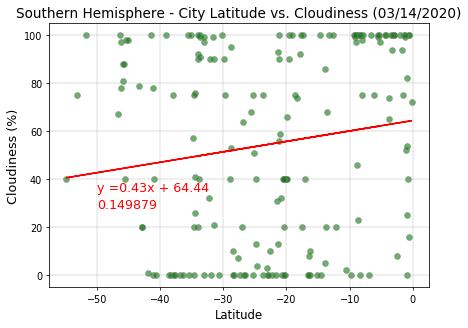

In [23]:
#Southern Hemmisphere linear Regression - City Latitude vs. Cloudiness

#Variables x and y
x_values = SoutHem_temp["Lat"]
y_values = SoutHem_temp["Cloudiness"]

# Get slope, intercept from linregress() to plot y' = intercept + slope*x
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Plot linear regression line.
y_pred = x_values * slope + intercept
equation = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
r2value = round(rvalue, 6)
print(f"The r-squared is: {rvalue}")
print(f'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2)))

#Plotting the scatter chart and line regression
plt.figure(figsize=(7,5), dpi=70)

plt.scatter(x_values,y_values, marker="o", facecolors="green", edgecolors="grey", 
            alpha=0.6)
plt.plot(x_values,y_pred,"r-")

#Aaesthetics
plt.annotate(equation,(-50,35),fontsize=13,color="red")
plt.annotate(r2value,(-50,28),fontsize=13,color="red")
plt.title("Southern Hemisphere - City Latitude vs. Cloudiness (03/14/2020)", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Cloudiness (%)", fontsize=13)
plt.grid(color='grey', linestyle='-', linewidth=0.5, alpha=0.5)

#Saving an image of this plot
plt.savefig("Images/19-SH LineRegress-CityLat vs Cloudiness.png")
plt.show()

#### Same case as the Northern Hemisphere

The r-squared is: -0.3015358167274971
y = -0.05x + 2.12


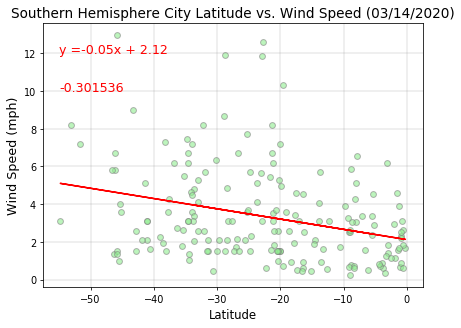

In [26]:
#Southern Hemisphere linear Regression - City Latitude vs. Wind Speed

#Variables x and y
x_values = SoutHem_temp["Lat"]
y_values = SoutHem_temp["Wind Speed"]

# Get slope, intercept from linregress() to plot y' = intercept + slope*x
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Plot linear regression line.
y_pred = x_values * slope + intercept
equation = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
r2value = round(rvalue, 6)
print(f"The r-squared is: {rvalue}")
print(f'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2)))

#Plotting the scatter chart and line regression
plt.figure(figsize=(7,5), dpi=70)

plt.scatter(x_values,y_values, marker="o", facecolors="lightgreen", edgecolors="grey", 
            alpha=0.6)
plt.plot(x_values,y_pred,"r-")

#Aaesthetics
plt.annotate(equation,(-55,12),fontsize=13,color="red")
plt.annotate(r2value,(-55,10),fontsize=13,color="red")
plt.title("Southern Hemisphere City Latitude vs. Wind Speed (03/14/2020)", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Wind Speed (mph)", fontsize=13)
plt.grid(color='grey', linestyle='-', linewidth=0.5, alpha=0.5)

#Saving an image of this plot
plt.savefig("Images/20-SH LineRegress-CityLat vs Cloudiness.png")
plt.show()

#### Same case as the Northern Hemisphere